In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import prepare as p
import explore as e

from scipy import stats
import sklearn.preprocessing as pre
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoLars

import warnings
warnings.filterwarnings("ignore")

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [56]:
df = pd.read_csv('school_data.csv')

In [57]:
df = p.clean_df()

In [58]:
df.shape

(1391, 16)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 1560
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   school_id                     1391 non-null   int64  
 1   english_1                     1391 non-null   float64
 2   english_2                     1391 non-null   float64
 3   algebra                       1391 non-null   float64
 4   biology                       1391 non-null   float64
 5   history                       1391 non-null   float64
 6   bilingual_or_english_learner  1391 non-null   float64
 7   econdis                       1391 non-null   float64
 8   salary                        1391 non-null   float64
 9   teacher_exp_6to10             1391 non-null   float64
 10  extracurricular_expend        1391 non-null   float64
 11  total_expend                  1391 non-null   float64
 12  student_teacher_ratio         1391 non-null   float64
 13  tea

In [60]:
#split
train, val, test  = e.tts(df)

In [61]:
train.shape, val.shape, test.shape

((778, 16), (334, 16), (279, 16))

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 778 entries, 404 to 1056
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   school_id                     778 non-null    int64  
 1   english_1                     778 non-null    float64
 2   english_2                     778 non-null    float64
 3   algebra                       778 non-null    float64
 4   biology                       778 non-null    float64
 5   history                       778 non-null    float64
 6   bilingual_or_english_learner  778 non-null    float64
 7   econdis                       778 non-null    float64
 8   salary                        778 non-null    float64
 9   teacher_exp_6to10             778 non-null    float64
 10  extracurricular_expend        778 non-null    float64
 11  total_expend                  778 non-null    float64
 12  student_teacher_ratio         778 non-null    float64
 13  te

In [63]:
# seperate target variable
# scale
def iso_target_variable(df):
    X = df.drop(columns = ['english_1', 'english_2', 'algebra', 'biology', 'history'])
    y = df['history']
    return X, y

In [64]:
#Root Mean Squared Error RMSE
def rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

In [65]:
X_Train, y_Train = iso_target_variable(train)
X_Val, y_Val = iso_target_variable(val)

In [66]:
#Baseline predictions

train['yhat_baseline'] = y_Train.mean()
train.head(3)


,school_id,english_1,english_2,algebra,biology,history,bilingual_or_english_learner,econdis,salary,teacher_exp_6to10,extracurricular_expend,total_expend,student_teacher_ratio,teacher_exp_0to5,teacher_exp_11_plus,high_edu,yhat_baseline
404,57905088,98.0,100.0,100.0,100.0,100.0,30.5,87.9,69483.0,26.9,38.0,7558.0,19.2,22.4,50.7,44.8,87.829049
429,57912005,45.0,47.0,79.0,94.0,75.0,47.5,85.4,63990.0,20.2,13.0,24531.0,5.9,51.9,27.9,31.1,87.829049
621,81902002,69.0,79.0,74.0,86.0,93.0,4.5,53.5,56116.0,5.2,1071.0,9636.0,11.3,29.7,65.2,22.8,87.829049


In [67]:

mse_train = mean_squared_error(y_Train, train.yhat_baseline)
rmse_train= np.sqrt(mse_train)###############################################
rmse_train



11.018928764909456

# Baseline RMSE = 11.02

In [68]:

def GLM(power, alpha, X_Train, y_Train, X_Val, y_Val):
    

    scaler = pre.MinMaxScaler()
    # Note that we only call .fit with the training data,
    # but we use .transform to apply the scaling to all the data splits.
    scaler.fit(X_Train)

    x_train_scaled = scaler.transform(X_Train)
    x_validate_scaled = scaler.transform(X_Val)
    #x_test_scaled = scaler.transform(x_test)

    # create the model object
    glm = TweedieRegressor(power=power, alpha=alpha)

    # fit the model to training data. must specify the column in y_train
    glm.fit(x_train_scaled, y_Train)

    # predict train
    y_pred_train = glm.predict(x_train_scaled)

    # evaluate: rmse
    mse_train = mean_squared_error(y_Train, y_pred_train)
    rmse_train= np.sqrt(mse_train)###############################################

    # predict validate
    glm.fit(x_validate_scaled, y_Val)
    y_pred_val = glm.predict(x_validate_scaled)

    # evaluate: rmse
    mse_val = mean_squared_error(y_Val, y_pred_val)
    rmse_val = np.sqrt(mse_val)##################################################


    
    return print("RMSE for GLM using Tweedie Regressor \nTraining/In-Sample: ", round(rmse_train), 
      "\nValidation/Out-of-Sample: ", round(rmse_val))

<AxesSubplot:>

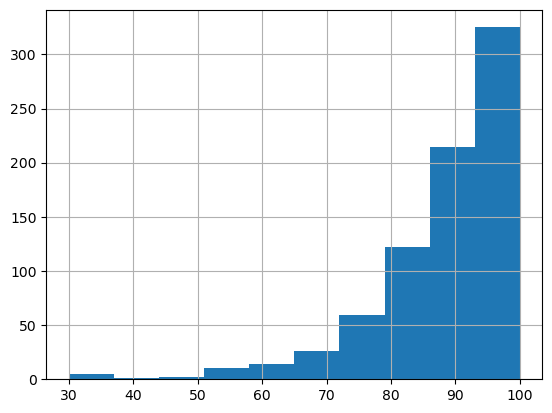

In [69]:
y_Train.hist()

In [70]:
#power =1 for poisson distribution of target variable
GLM(1, 0, X_Train, y_Train, X_Val, y_Val)

RMSE for GLM using Tweedie Regressor 
Training/In-Sample:  9 
Validation/Out-of-Sample:  8


In [87]:
#using Andy's function to see if polynomial regression is better than Tweedie Regressor
def subject_model(df, target, degree=2):
    '''
    this function will split, scale, and model english 1
    '''
    train, val, test=e.tts(df)
    
    X_train=train.drop(columns=['biology', 'english_1', 'english_2', 'algebra', 'history', 'school_id'])
    y_train=pd.DataFrame(train[target])

    X_val=val.drop(columns=['biology', 'english_1', 'english_2', 'algebra', 'history', 'school_id'])
    y_val=pd.DataFrame(val[target])

    X_test=test.drop(columns=['biology', 'english_1', 'english_2', 'algebra', 'history', 'school_id'])
    y_test=pd.DataFrame(test[target])
    
    scaler=pre.MinMaxScaler()
    
    num_cols = ['bilingual_or_english_learner',
            'econdis',
            'salary',
            'teacher_exp_6to10',
            'extracurricular_expend',
            'total_expend',
            'student_teacher_ratio',
            'teacher_exp_0to5',
            'teacher_exp_11_plus',
            'high_edu']
    scaler.fit(X_train)

    X_train[num_cols] = scaler.transform(X_train[num_cols])
    X_val[num_cols] = scaler.transform(X_val[num_cols])
    X_test[num_cols] = scaler.transform(X_test[num_cols])
    
    '''
    this model will create the object and run the polynomyal regression model for english 1
    '''
    pf = PolynomialFeatures(degree=degree)
    
    X_train_degree2 = pf.fit_transform(X_train)
    X_validate_degree2 = pf.transform(X_val)
    X_test_degree2 = pf.transform(X_test)
    
    lm2 = LinearRegression()
    lm2.fit(X_train_degree2, y_train[target])

    y_train[f'{target}_pred_lm2'] = lm2.predict(X_train_degree2)
    rmse_train = mean_squared_error(y_train[target], y_train[f'{target}_pred_lm2'], squared=False)

    y_val[f'{target}_pred_lm2'] = lm2.predict(X_validate_degree2)
    rmse_validate = mean_squared_error(y_val[target], y_val[f'{target}_pred_lm2'], squared=False)

    print(f"RMSE for Polynomial Model, degrees={degree}\nTraining/In-Sample: ", rmse_train, 
          "\nValidation/Out-of-Sample: ", rmse_validate)

In [89]:
subject_model(df, 'history', degree= 1)

RMSE for Polynomial Model, degrees=1
Training/In-Sample:  9.387695076749957 
Validation/Out-of-Sample:  8.717283608982898


In [97]:
# try StandardScaler and RobustScaler on LassoLars


#using Andy's function to see if polynomial regression is better than Tweedie Regressor
def subject_model(df, target):
    '''
    this function will split, scale, and model english 1
    '''
    train, val, test=e.tts(df)
    
    X_train=train.drop(columns=['biology', 'english_1', 'english_2', 'algebra', 'history', 'school_id'])
    y_train=pd.DataFrame(train[target])

    X_val=val.drop(columns=['biology', 'english_1', 'english_2', 'algebra', 'history', 'school_id'])
    y_val=pd.DataFrame(val[target])

    X_test=test.drop(columns=['biology', 'english_1', 'english_2', 'algebra', 'history', 'school_id'])
    y_test=pd.DataFrame(test[target])
    
    scaler=pre.StandardScaler()
    
    num_cols = ['bilingual_or_english_learner',
            'econdis',
            'salary',
            'teacher_exp_6to10',
            'extracurricular_expend',
            'total_expend',
            'student_teacher_ratio',
            'teacher_exp_0to5',
            'teacher_exp_11_plus',
            'high_edu']
    
    scaler.fit(X_train)

    X_train[num_cols] = scaler.transform(X_train[num_cols])
    X_val[num_cols] = scaler.transform(X_val[num_cols])
    X_test[num_cols] = scaler.transform(X_test[num_cols])
    
    '''
    this model will create the object and run the polynomyal regression model for english 1
    '''
    lars = LassoLars(alpha=1.0)


    X_train_degree2 = lars.fit(X_train, y_train)
    #X_validate_degree2 = lars.transform(X_val)
    #X_test_degree2 = lars.transform(X_test)

    x_train_pred

    y_train[f'{target}_pred_lm2'] = lm2.predict(X_train_degree2)
    rmse_train = mean_squared_error(y_train[target], y_train[f'{target}_pred_lm2'], squared=False)

    y_val[f'{target}_pred_lm2'] = lm2.predict(X_validate_degree2)
    rmse_validate = mean_squared_error(y_val[target], y_val[f'{target}_pred_lm2'], squared=False)

    print(f"RMSE for Polynomial Model, degrees={degree}\nTraining/In-Sample: ", rmse_train, 
          "\nValidation/Out-of-Sample: ", rmse_validate)

In [96]:
subject_model(df, 'history')

ValueError: Expected 2D array, got scalar array instead:
array=LassoLars().
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:

def OLS(X_Train, y_Train, X_Val, y_Val):
    

    scaler = pre.StandardScaler()
    # Note that we only call .fit with the training data,
    # but we use .transform to apply the scaling to all the data splits.
    X_Train_scaled = scaler.fit(X_Train)

    # create the model object
    

    # fit the model to training data. must specify the column in y_train
    glm.fit(x_train_scaled, y_Train)

    # predict train
    y_pred_train = glm.predict(x_train_scaled)

    # evaluate: rmse
    mse_train = mean_squared_error(y_Train, y_pred_train)
    rmse_train= np.sqrt(mse_train)###############################################

    # predict validate
    glm.fit(x_validate_scaled, y_Val)
    y_pred_val = glm.predict(x_validate_scaled)

    # evaluate: rmse
    mse_val = mean_squared_error(y_Val, y_pred_val)
    rmse_val = np.sqrt(mse_val)##################################################


    
    return print("RMSE for GLM using Tweedie Regressor \nTraining/In-Sample: ", round(rmse_train), 
      "\nValidation/Out-of-Sample: ", round(rmse_val))